# Vectorisation 2-gram TF-IDF avec CountVectorizer et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Comment puis-je rejoindre Persan à partir de S...,1,0,0,0
1,Je prévois un voyage de VILLEFRANCHE-DE-CONFLE...,1,0,0,0
2,Go from the city of Sarlat La Caneda to Souillac.,0,1,0,0
3,What is the best way to go from Allamps-Esat t...,0,1,0,0
4,zg xqmajyjpfxsvvgycgqd c e i y ehgbcf f e o...,0,0,0,1
...,...,...,...,...,...
1528934,Tom met Mary in the lobby of the building.,0,1,1,0
1528935,Trouve un moyen d'atteindre BÉNING-LÈS-SAINT-A...,1,0,0,0
1528936,"]r.0j>&{TFQpZ(E\]""[$+mFhI/1*'vfL-X0G_x1MY&fn2+...",0,0,0,1
1528937,How long had you been sick before you saw the ...,0,1,1,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


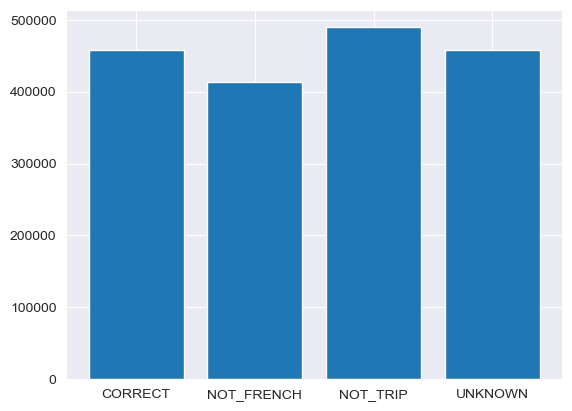

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(611576,) (76447,) (76447,)
(611576, 4) (76447, 4) (76447, 4)


In [5]:
X_train.values

array(["Peux-tu m'aider à planifier le trajet depuis neuwiller-r.-bouxwiller jusqu'à pontgibaud-ville ?",
       'Find a way to leave the train station of albens.',
       "En partant d'objat, je voudrais savoir comment me rendre chez Giulyan à janzé, est-ce que tu peux m'aider ?",
       ..., "Partez de Vichy, c'est le début de l'aventure.",
       'Gardons cela en secret.',
       'Xi[8%l~jK(.!u:c;0,7a+JR5Sq6i_dOrpv3R7j}+X8rP3nRW7=_~H@CTvsu{P$dJ0BiR"/>?x#~kxNo5W/~CkHTWioPm'],
      dtype=object)

# Exemple d'utilisation de TfidfVectorizer

In [6]:
ngram_range = (2, 2)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(ngram_range=ngram_range)

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<611576x2498582 sparse matrix of type '<class 'numpy.float64'>'
	with 6297470 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [8]:
v.get_feature_names_out()[100000:100050]

array(['5f9 wyuio8nrnm', '5f95yc0 wmil', '5f9eh ld5w', '5f9fc 2tk',
       '5f9ktuz k6h', '5f9ude nc', '5f_ 1ncrhunm', '5f_ aq_bnx',
       '5f_2s1_ t0r', '5f_klfwf5ayw 4mvw', '5f_l5 l0r', '5f_m cz',
       '5f_ms xe', '5f_ptji 0muxvgjc', '5f_t7r y_xh', '5f_v cg',
       '5f_vev mhg', '5fa 4a', '5fa 6v', '5fa oab5', '5fa uv',
       '5fa3 6aanird', '5fa_ b4', '5faa hwll', '5fac ob', '5fagz ut2',
       '5far 0b', '5fat7 j8t', '5faw ybya', '5faylx ua2hk_d7', '5fb 9z9',
       '5fb ectbws', '5fb5 vs', '5fbaot q8yr', '5fbk kq', '5fbm mvrl',
       '5fbpiqagjw1w_tr nw', '5fbuvj xq_x', '5fby nj', '5fc tqz5',
       '5fcckjyz 7feli', '5fcf4 rnefz', '5fcgxq7ciz ga', '5fcm ox',
       '5fcv zwlmsw', '5fczd zf', '5fd ra', '5fd yu', '5fdczsm8ov il',
       '5fdfzj mv'], dtype=object)

In [9]:
# Number of identified features
v.get_feature_names_out().shape

(2498582,)

In [10]:
v = TfidfVectorizer(ngram_range=ngram_range)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x414894 sparse matrix of type '<class 'numpy.float64'>'
	with 5171355 stored elements in Compressed Sparse Row format>

In [11]:
# Number of identified features
v.get_feature_names_out().shape

(414894,)

In [12]:
v.get_feature_names_out()[30000:30050]

array(['aus eu', 'aus euch', 'aus euroländern', 'aus fahrlässigkeit',
       'aus fleisch', 'aus gelockt', 'aus geschmolzenem', 'aus gesehen',
       'aus gold', 'aus grober', 'aus großbritannien', 'aus großen',
       'aus größter', 'aus gutem', 'aus güte', 'aus hass', 'aus honig',
       'aus ich', 'aus ihm', 'aus ihrem', 'aus in', 'aus indien',
       'aus japan', 'aus jeder', 'aus kanada', 'aus karton',
       'aus kunststoff', 'aus lässt', 'aus lügen', 'aus mangel',
       'aus marias', 'aus material', 'aus mehreren', 'aus mein',
       'aus meinem', 'aus meiner', 'aus mich',
       'aus minderwertigkeitsgefühl', 'aus minnesota', 'aus mir',
       'aus münchen', 'aus nachbarbezirken', 'aus oder', 'aus optimist',
       'aus osaka', 'aus paris', 'aus plastik', 'aus populistischen',
       'aus prag', 'aus profilen'], dtype=object)

In [13]:
# Add threshold to observe only words that appear at least 100 times
v = TfidfVectorizer(ngram_range=ngram_range, min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x4400 sparse matrix of type '<class 'numpy.float64'>'
	with 4052545 stored elements in Compressed Sparse Row format>

In [14]:
# Number of identified features
v.get_feature_names_out().shape

(4400,)

In [15]:
v.get_feature_names_out()[::50]

array(['11 nov', 'aller brioude', 'another city', 'aubenas en',
       'bains marchezais', 'besancon depuis', 'bouxwiller to',
       'buzançais to', 'cdg en', 'charmilles to', 'christophe nais',
       'communay depuis', 'damblain en', 'de audun', 'de bouxwiller',
       'de chandieu', 'de deauville', 'de frasne', 'de la',
       'de lutzelbourg', 'de mons', 'de nogent', 'de quimperle',
       'de sarlat', 'de travers', 'de vézelise', 'depuis buzançais',
       'depuis langeac', 'depuis reipertswiller', 'depuis étampes',
       'dole épierre', 'ecol to', 'epinal en', 'fecamp to', 'franois en',
       'from commentry', 'from mantes', 'from rouen', 'fuzelier en',
       'gramat to', 'hbf to', 'il possible', 'ist die', 'journey ends',
       'la le', 'laveline bruy', 'leave from', 'lispach en',
       'luchon richelieu', 'léonard en', 'marmande depuis',
       'meet somewhere', 'moeskroen to', 'montpellier nevers',
       'médiathèque depuis', 'non andate', 'of arnac', 'of briancon',
   

# Utilisation d'un pipeline SKLearn (vectorizer TfidfVectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=ngram_range)),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [17]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.90      1.00      0.95     22922
  NOT_FRENCH       1.00      0.94      0.97     20852
    NOT_TRIP       1.00      0.82      0.90     24510
     UNKNOWN       1.00      0.00      0.00     22772

   micro avg       0.96      0.69      0.80     91056
   macro avg       0.98      0.69      0.71     91056
weighted avg       0.98      0.69      0.70     91056
 samples avg       0.65      0.64      0.65     91056



C:\Users\nathp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

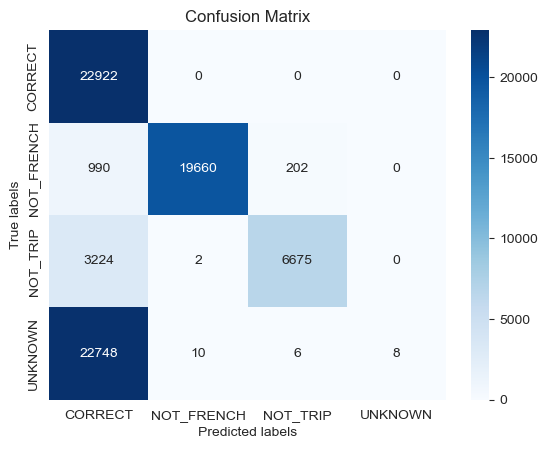

In [19]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

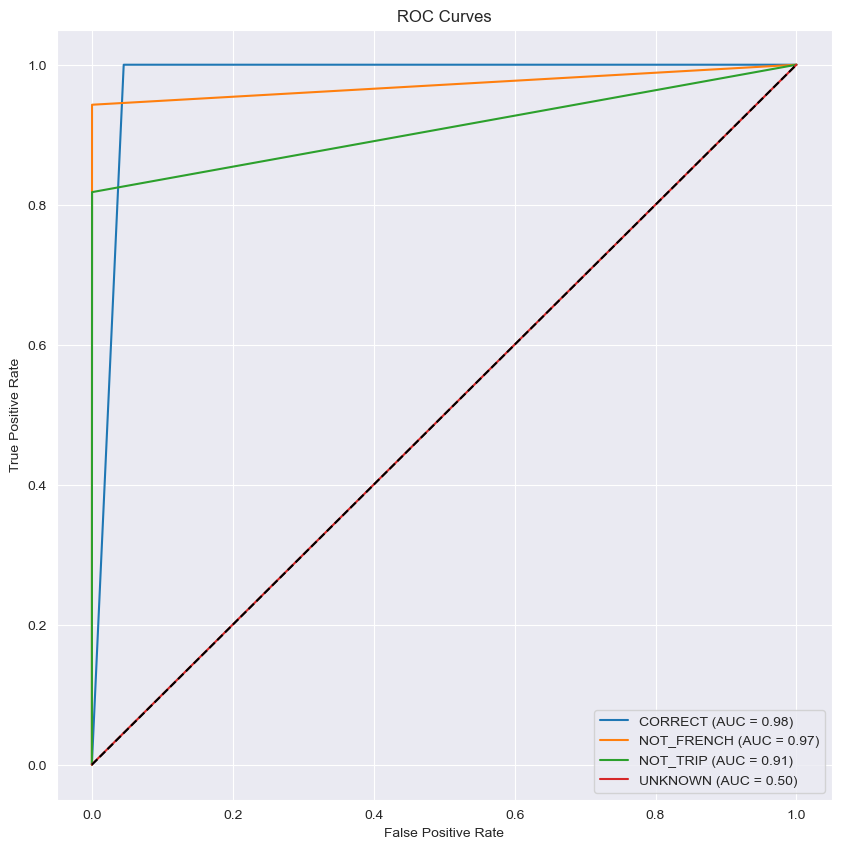

In [20]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [21]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 13.0%
 - NOT_FRENCH => 0.4%
 - NOT_TRIP => 75.7%
 - UNKNOWN => 0.4%

* Je veux aller du cinéma au restaurant
 - CORRECT => 17.2%
 - NOT_FRENCH => 0.6%
 - NOT_TRIP => 69.1%
 - UNKNOWN => 0.5%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 5.6%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.1%
 - NOT_FRENCH => 99.7%
 - NOT_TRIP => 1.9%
 - UNKNOWN => 0.1%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 29.9%
 - NOT_FRENCH => 27.1%
 - NOT_TRIP => 32.0%
 - UNKNOWN => 30.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 99.8%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.1%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 39.9%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 43.2%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 29.9%
 - NOT_FRENCH => 27.1%
 - NOT_TRIP => 32.0%
 - UNKNOWN => 30.0%

* Dirige moi vers Lyon depuis Saint-Ét

### Pour un même classifier, la vectorisation TF-IDF semble moins performante que la N-grams ou la BoW (voir matrice de confusion).